In [1]:
import os
import pandas as pd
import matplotlib .pyplot as plt
import numpy as np

In [2]:
cte_data = pd.read_csv("Clean_and_Combine.csv")
cte_data.head()

,DISTRICT,SERVICE,SERVICEX,CTE_STUDENTS_2015,CTE_HOURS_2015,CTE_AVG_2015,ALL_STUDENTS_2015,ALL_HOURS_2015,ALL_AVG_2015,CTE_STUDENTS_2016,...,CTE_AVG_2017,ALL_STUDENTS_2017,ALL_HOURS_2017,ALL_AVG_2017,CTE_STUDENTS_2018,CTE_HOURS_2018,CTE_AVG_2018,ALL_STUDENTS_2018,ALL_HOURS_2018,ALL_AVG_2018
0,1902,3101100,PRECALCULUS (PRE CALC),9.0,36.0,4.0,18.0,54.0,3.0,9.0,...,5.8,13.0,75.0,5.8,15.0,45.0,3.0,15.0,45.0,3.0
1,1902,3220300,ENGLISH III (ENG 3),12.0,48.0,4.0,12.0,48.0,4.0,18.0,...,6.0,15.0,87.0,5.8,15.0,90.0,6.0,17.0,102.0,6.0
2,1902,3220400,ENGLISH IV (ENG 4),10.0,57.0,5.7,14.0,81.0,5.8,7.0,...,5.6,15.0,84.0,5.6,15.0,81.0,5.4,15.0,81.0,5.4
3,1902,3310300,ECONOMICS W/EMPH FREE ENTERPR,3.0,3.0,3.0,3.0,3.0,3.0,10.0,...,3.0,12.0,36.0,3.0,6.0,18.0,3.0,6.0,18.0,3.0
4,1902,3330100,UNITED STATES GOVERNMENT (GOVT,3.0,3.0,3.0,3.0,3.0,3.0,12.0,...,3.0,15.0,45.0,3.0,6.0,18.0,3.0,6.0,18.0,3.0


In [3]:
bins = [0, 2999999, 3200000, 3300000, 4000000, 2000000000]
group_labels = ["Misc","STEM","English","Social Sciences","CTE/Tech"]

In [4]:
cte_data["Course Type"] = pd.cut(cte_data["SERVICE"], bins, labels=group_labels)
cte_data.head()

,DISTRICT,SERVICE,SERVICEX,CTE_STUDENTS_2015,CTE_HOURS_2015,CTE_AVG_2015,ALL_STUDENTS_2015,ALL_HOURS_2015,ALL_AVG_2015,CTE_STUDENTS_2016,...,ALL_STUDENTS_2017,ALL_HOURS_2017,ALL_AVG_2017,CTE_STUDENTS_2018,CTE_HOURS_2018,CTE_AVG_2018,ALL_STUDENTS_2018,ALL_HOURS_2018,ALL_AVG_2018,Course Type
0,1902,3101100,PRECALCULUS (PRE CALC),9.0,36.0,4.0,18.0,54.0,3.0,9.0,...,13.0,75.0,5.8,15.0,45.0,3.0,15.0,45.0,3.0,STEM
1,1902,3220300,ENGLISH III (ENG 3),12.0,48.0,4.0,12.0,48.0,4.0,18.0,...,15.0,87.0,5.8,15.0,90.0,6.0,17.0,102.0,6.0,English
2,1902,3220400,ENGLISH IV (ENG 4),10.0,57.0,5.7,14.0,81.0,5.8,7.0,...,15.0,84.0,5.6,15.0,81.0,5.4,15.0,81.0,5.4,English
3,1902,3310300,ECONOMICS W/EMPH FREE ENTERPR,3.0,3.0,3.0,3.0,3.0,3.0,10.0,...,12.0,36.0,3.0,6.0,18.0,3.0,6.0,18.0,3.0,Social Sciences
4,1902,3330100,UNITED STATES GOVERNMENT (GOVT,3.0,3.0,3.0,3.0,3.0,3.0,12.0,...,15.0,45.0,3.0,6.0,18.0,3.0,6.0,18.0,3.0,Social Sciences


In [5]:
type_courses = cte_data["Course Type"].value_counts()
type_courses
#combine math/science together called STEM

CTE/Tech           6969
Social Sciences    6437
English            3038
STEM               2877
Misc                584
Name: Course Type, dtype: int64

In [6]:
cte = cte_data[cte_data['Course Type'] == "CTE/Tech"]
soc_sci = cte_data[cte_data['Course Type'] == "Social Sciences"]
english = cte_data[cte_data['Course Type'] == "English"]
stem = cte_data[cte_data['Course Type'] == "STEM"]
misc = cte_data[cte_data['Course Type'] == "Misc"]


In [7]:
cte_count = cte["Course Type"].count()
soc_sci_count = soc_sci["Course Type"].count()
english_count = english["Course Type"].count()
stem_count = stem["Course Type"].count()
misc_count = misc["Course Type"].count()

In [8]:
#total course count for 2015,2016,2017,2018
#count of values for each year that are not equal to 0
cte_clean_15 = cte_data.loc[cte_data["CTE_HOURS_2015"] != 0]
count_15 = cte_clean_15["CTE_HOURS_2015"].count()

cte_clean_16 = cte_data.loc[cte_data["CTE_HOURS_2016"] != 0]
count_16 = cte_clean_16["CTE_HOURS_2016"].count()

cte_clean_17 = cte_data.loc[cte_data["CTE_HOURS_2017"] != 0]
count_17 = cte_clean_17["CTE_HOURS_2017"].count()

cte_clean_18 = cte_data.loc[cte_data["CTE_HOURS_2018"] != 0]
count_18 = cte_clean_18["CTE_HOURS_2018"].count()

In [9]:
#subject count for 2015

cte_15 = cte.loc[cte["CTE_HOURS_2015"] != 0]
cte_total_15 = cte_15['CTE_HOURS_2015'].count()

soc_sci_15 = soc_sci.loc[soc_sci["CTE_HOURS_2015"] != 0]
soc_sci_total_15 = soc_sci_15['CTE_HOURS_2015'].count()

english_15 = english.loc[english["CTE_HOURS_2015"] != 0]
english_total_15 = english_15['CTE_HOURS_2015'].count()

stem_15 = stem.loc[stem["CTE_HOURS_2015"] != 0]
stem_total_15 = stem_15['CTE_HOURS_2015'].count()

misc_15 = misc.loc[misc["CTE_HOURS_2015"] != 0]
misc_total_15 = misc_15['CTE_HOURS_2015'].count()

In [10]:
#percentages for 2015
cte_perc_15 = cte_total_15 / count_15*100
ss_perc_15 = soc_sci_total_15 / count_15*100
eng_perc_15 = english_total_15 / count_15*100
stem_perc_15 = stem_total_15 / count_15*100
misc_perc_15 = misc_total_15 / count_15*100

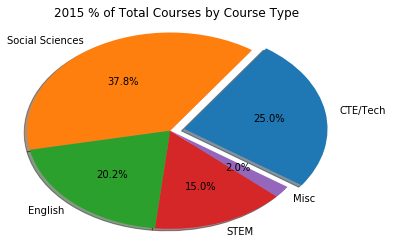

In [11]:
#pie chart for 2015
labels = ["CTE/Tech", "Social Sciences", "English", "STEM", "Misc"]
sizes = [cte_perc_15, ss_perc_15, eng_perc_15, stem_perc_15, misc_perc_15]
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=325)
plt.title("2015 % of Total Courses by Course Type")
plt.axis('auto')
plt.savefig("Images/2015CourseData")
plt.show()

In [12]:
#subject count for 2016
cte_16 = cte.loc[cte["CTE_HOURS_2016"] != 0]
cte_total_16 = cte_16['CTE_HOURS_2016'].count()

soc_sci_16 = soc_sci.loc[soc_sci["CTE_HOURS_2016"] != 0]
soc_sci_total_16 = soc_sci_16['CTE_HOURS_2016'].count()

english_16 = english.loc[english["CTE_HOURS_2016"] != 0]
english_total_16 = english_16['CTE_HOURS_2016'].count()

stem_16 = stem.loc[stem["CTE_HOURS_2016"] != 0]
stem_total_16 = stem_16['CTE_HOURS_2016'].count()

misc_16 = misc.loc[misc["CTE_HOURS_2016"] != 0]
misc_total_16 = misc_16['CTE_HOURS_2016'].count()

In [13]:
#percentages for 2016
cte_perc_16 = cte_total_16 / count_16*100
ss_perc_16 = soc_sci_total_16/ count_16*100
eng_perc_16 = english_total_16 / count_16*100
stem_perc_16 = stem_total_16 / count_16*100
misc_perc_16 = misc_total_16 / count_16*100

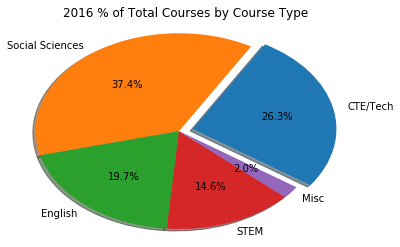

In [14]:
#pie chart for 2016
labels = ["CTE/Tech", "Social Sciences", "English", "STEM", "Misc"]
sizes = [cte_perc_16, ss_perc_16, eng_perc_16, stem_perc_16, misc_perc_16]
explode = (0.1, 0, 0, 0, 0)


plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=325)
plt.title("2016 % of Total Courses by Course Type")
plt.axis('auto')
plt.savefig("Images/2016CourseData")
plt.show()

In [15]:
#subject count for 2017
cte_17 = cte.loc[cte["CTE_HOURS_2017"] != 0]
cte_total_17 = cte_17['CTE_HOURS_2017'].count()

soc_sci_17 = soc_sci.loc[soc_sci["CTE_HOURS_2017"] != 0]
soc_sci_total_17 = soc_sci_16['CTE_HOURS_2017'].count()

english_17 = english.loc[english["CTE_HOURS_2017"] != 0]
english_total_17 = english_17['CTE_HOURS_2017'].count()

stem_17 = stem.loc[stem["CTE_HOURS_2017"] != 0]
stem_total_17 = stem_17['CTE_HOURS_2017'].count()

misc_17 = misc.loc[misc["CTE_HOURS_2017"] != 0]
misc_total_17 = misc_17['CTE_HOURS_2017'].count()

In [16]:
#percentages for 2017
cte_perc_17 = cte_total_17 / count_17*100
ss_perc_17 = soc_sci_total_17 / count_17*100
eng_perc_17 = english_total_17 / count_17*100
stem_perc_17 = stem_total_17 / count_17*100
misc_perc_17 = misc_total_17 / count_17*100

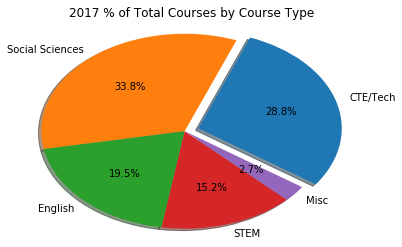

In [17]:
#pie chart for 2017
labels = ["CTE/Tech", "Social Sciences", "English", "STEM", "Misc"]
sizes = [cte_perc_17, ss_perc_17, eng_perc_17, stem_perc_17, misc_perc_17]
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=325)
plt.title("2017 % of Total Courses by Course Type")
plt.axis('auto')
plt.savefig("Images/2017CourseData")
plt.show()

In [18]:
#subject count for 2018
cte_18 = cte.loc[cte["CTE_HOURS_2018"] != 0]
cte_total_18 = cte_18['CTE_HOURS_2018'].count()

soc_sci_18 = soc_sci.loc[soc_sci["CTE_HOURS_2018"] != 0]
soc_sci_total_18 = soc_sci_18['CTE_HOURS_2018'].count()

english_18 = english.loc[english["CTE_HOURS_2018"] != 0]
english_total_18 = english_18['CTE_HOURS_2018'].count()

stem_18 = stem.loc[stem["CTE_HOURS_2018"] != 0]
stem_total_18 = stem_18['CTE_HOURS_2018'].count()

misc_18 = misc.loc[misc["CTE_HOURS_2018"] != 0]
misc_total_18 = misc_18['CTE_HOURS_2018'].count()

In [19]:
#percentages for 2018
cte_perc_18 = cte_total_18 / count_18*100
ss_perc_18 = soc_sci_total_18 / count_18*100
eng_perc_18 = english_total_18 / count_18*100
stem_perc_18 = stem_total_18 / count_18*100
misc_perc_18 = misc_total_18 / count_18*100

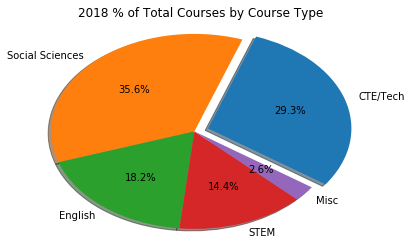

In [20]:
#pie chart for 2018
labels = ["CTE/Tech", "Social Sciences", "English", "STEM", "Misc"]
sizes = [cte_perc_18, ss_perc_18, eng_perc_18, stem_perc_18, misc_perc_18]
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=325)
plt.title("2018 % of Total Courses by Course Type")
plt.axis('auto')
plt.savefig("Images/2018CourseData")
plt.show()